In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
tickers = ['MSFT','F','T','GE','PG']
tickers_data = pd.DataFrame()
startdate = datetime(2015,1,1)
enddate = datetime(2023,1,1)
for i in tickers:
    tickers_data[i] = pdr.get_data_yahoo(i,start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tickers_data.head()

,MSFT,F,T,GE,PG
Date,,,,,
2015-01-02,40.620663,10.062553,13.416449,130.389709,70.860870
2015-01-05,40.247131,9.669489,13.289685,127.996277,70.523941
2015-01-06,39.656395,9.577770,13.309491,125.238617,70.202698
2015-01-07,40.160252,9.852918,13.387094,125.290649,70.570961
2015-01-08,41.341694,10.101861,13.520285,126.799553,71.377953


In [4]:
tickers_data.iloc[0]

MSFT     40.620663
F        10.062553
T        13.416449
GE      130.389709
PG       70.860870
Name: 2015-01-02 00:00:00, dtype: float64

## Normalization to 100:
###    (Pt/P0)*100


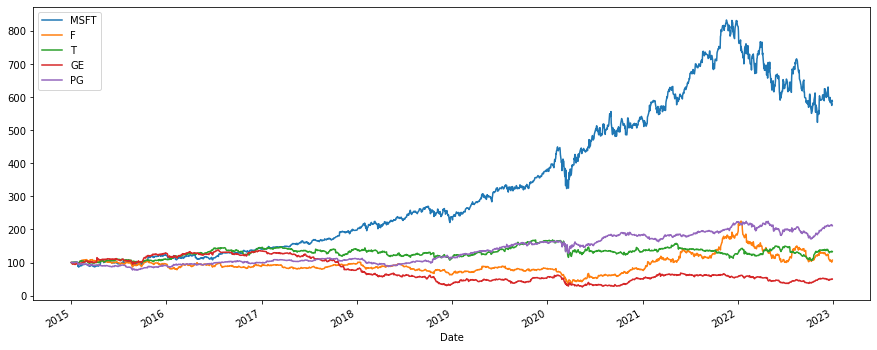

In [5]:
((tickers_data/tickers_data.iloc[0])*100).plot(figsize=(15,6))
plt.show()

## Calculating the Rate of Return of above portfolio

In [6]:
returns = (tickers_data/tickers_data.shift(1)) - 1
returns.head()

,MSFT,F,T,GE,PG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009196,-0.039062,-0.009448,-0.018356,-0.004755
2015-01-06,-0.014678,-0.009485,0.001490,-0.021545,-0.004555
2015-01-07,0.012706,0.028728,0.005831,0.000415,0.005246
2015-01-08,0.029418,0.025266,0.009949,0.012043,0.011435


In [7]:
weight_1 = np.array([0.2,0.2,0.2,0.2,0.2])

In [8]:
# for calculating the vector or matrix product
np.dot(returns, weight_1)

array([        nan, -0.01616337, -0.00975454, ..., -0.01380119,
        0.02399913, -0.00111581])

In [9]:
annual_returns = returns.mean() * 250
annual_returns

MSFT    0.259306
F       0.072599
T       0.060726
GE     -0.019368
PG      0.111239
dtype: float64

In [10]:
np.dot(annual_returns,weight_1)

0.09690037753714663

In [11]:
profile_1 = np.dot(annual_returns,weight_1) * 100
profile_1

9.690037753714662

In [12]:
# On changinf the weights of the stocks
weight_2 = np.array([0.25,0.25,0.1,0.1,0.3])

In [13]:
profile_2 = np.dot(annual_returns,weight_2) * 100
profile_2

12.048369004034837